In [13]:
import pandas as pd

# โหลดข้อมูล
df = pd.read_csv("VL_pm_data.csv", parse_dates=["timestamp"])

# ตรวจสอบโครงสร้างข้อมูล
print(df.info())

# ตรวจสอบค่าหาย
print(df.isnull().sum())

# ตรวจสอบค่าสถิติต่าง ๆ
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   971 non-null    int64         
 1   timestamp    971 non-null    datetime64[ns]
 2   timezone     971 non-null    object        
 3   humidity     971 non-null    float64       
 4   pm_2_5       971 non-null    float64       
 5   pm_2_5_sp    971 non-null    float64       
 6   temperature  971 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 53.2+ KB
None
Unnamed: 0     0
timestamp      0
timezone       0
humidity       0
pm_2_5         0
pm_2_5_sp      0
temperature    0
dtype: int64
       Unnamed: 0                      timestamp    humidity      pm_2_5  \
count  971.000000                            971  971.000000  971.000000   
mean   485.000000  2023-10-11 16:28:15.120494336   48.909280   14.914343   
min     

In [14]:
print(df.isnull().sum())

Unnamed: 0     0
timestamp      0
timezone       0
humidity       0
pm_2_5         0
pm_2_5_sp      0
temperature    0
dtype: int64


In [26]:
Q1 = df["pm_2_5"].quantile(0.25)
Q3 = df["pm_2_5"].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df["pm_2_5"] < (Q1 - 1.5 * IQR)) | (df["pm_2_5"] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # นับจำนวนค่าผิดปกติในแต่ละคอลัมน์

22


In [30]:
import pandas as pd
import numpy as np

# 📌 โหลด DataFrame (สมมติว่าข้อมูลอยู่ใน df)
df = df.copy()

# 1. เลือกเฉพาะคอลัมน์ตัวเลข
df_numeric = df.select_dtypes(include=[np.number])

# 2. แทนค่า NaN ด้วยค่ามัธยฐาน
df_numeric = df_numeric.fillna(df_numeric.median())

# 3. กำหนดขอบเขตค่าปกติของแต่ละคอลัมน์
column_limits = {
    "pm_2_5": (2, 40),        
    "pm_2_5_sp": (2, 50),      
    "humidity": (35, 70),      
    "temperature": (27, 39)    
}

# 4. แทนค่าผิดปกติ (Outliers) ด้วยค่ามัธยฐาน
for col, (lower, upper) in column_limits.items():
    if col in df_numeric.columns:
        median_value = df_numeric[col].median()
        df_numeric[col] = np.where(df_numeric[col] < lower, median_value, df_numeric[col])
        df_numeric[col] = np.where(df_numeric[col] > upper, median_value, df_numeric[col])

# 5. 📌 นำค่าที่ทำความสะอาดแล้วกลับไปใช้ใน df
df[df_numeric.columns] = df_numeric  

# 6. แสดงข้อมูลที่ทำความสะอาดแล้ว
print(df.describe())


       Unnamed: 0                      timestamp    humidity      pm_2_5  \
count  971.000000                            971  971.000000  971.000000   
mean   485.000000  2023-10-11 16:28:15.120494336   48.896311   14.703624   
min      0.000000            2022-05-24 07:00:00   36.365861    2.069515   
25%    242.500000            2023-02-13 19:00:00   45.065212    9.592870   
50%    485.000000            2023-10-14 07:00:00   48.307295   13.739259   
75%    727.500000            2024-06-14 19:00:00   52.416794   18.407792   
max    970.000000            2025-02-11 11:12:42   65.003935   39.198927   
std    280.447856                            NaN    5.065302    6.993821   

        pm_2_5_sp  temperature  
count  971.000000   971.000000  
mean    15.624755    34.458287  
min      2.078204    27.175965  
25%      9.837589    33.175804  
50%     14.202060    34.533514  
75%     19.676298    35.833229  
max     47.567755    38.955797  
std      8.101060     1.880101  


In [31]:
df_cleaned = df.copy()  # ใช้สำเนาของ DataFrame ที่แก้ไขแล้ว
print(df_cleaned.describe())

       Unnamed: 0                      timestamp    humidity      pm_2_5  \
count  971.000000                            971  971.000000  971.000000   
mean   485.000000  2023-10-11 16:28:15.120494336   48.896311   14.703624   
min      0.000000            2022-05-24 07:00:00   36.365861    2.069515   
25%    242.500000            2023-02-13 19:00:00   45.065212    9.592870   
50%    485.000000            2023-10-14 07:00:00   48.307295   13.739259   
75%    727.500000            2024-06-14 19:00:00   52.416794   18.407792   
max    970.000000            2025-02-11 11:12:42   65.003935   39.198927   
std    280.447856                            NaN    5.065302    6.993821   

        pm_2_5_sp  temperature  
count  971.000000   971.000000  
mean    15.624755    34.458287  
min      2.078204    27.175965  
25%      9.837589    33.175804  
50%     14.202060    34.533514  
75%     19.676298    35.833229  
max     47.567755    38.955797  
std      8.101060     1.880101  


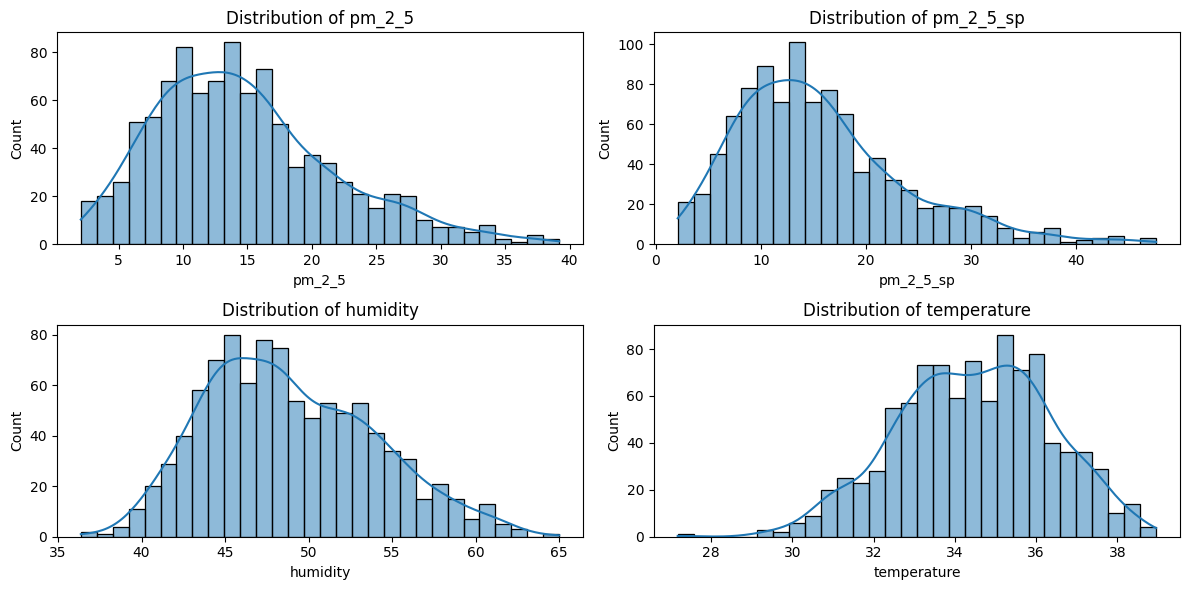

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for i, col in enumerate(["pm_2_5", "pm_2_5_sp", "humidity", "temperature"], 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


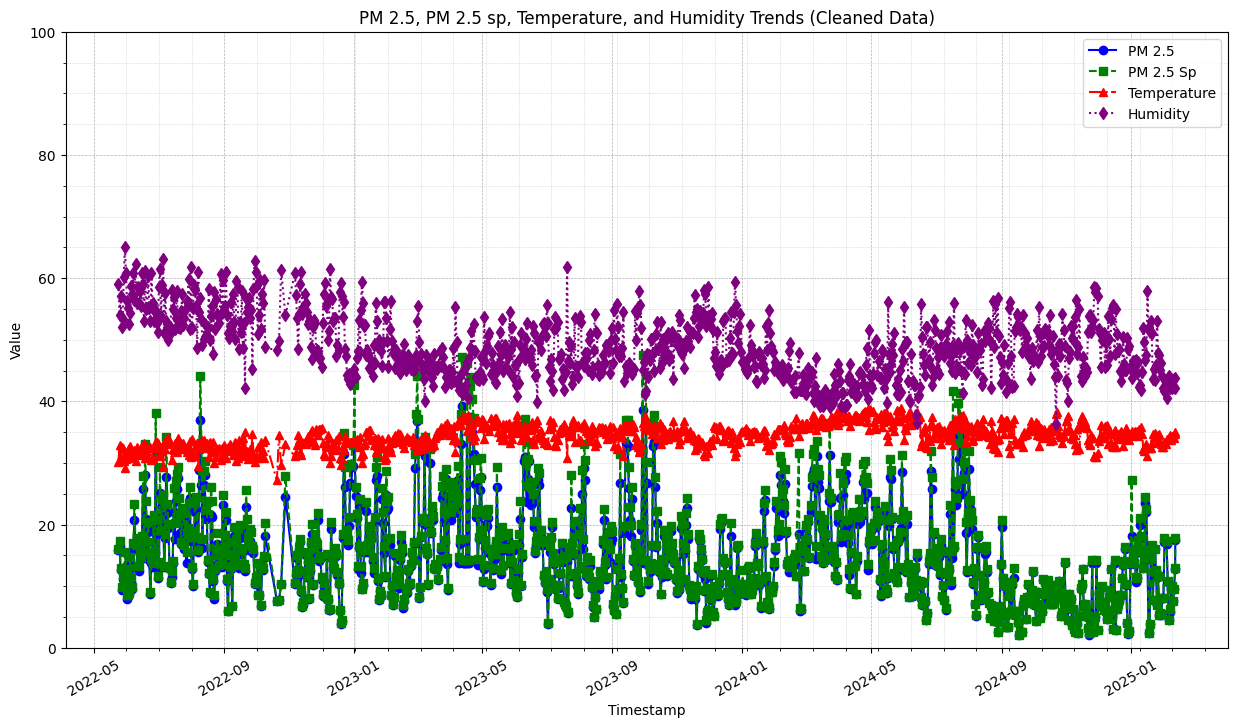

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# ตรวจสอบว่ามีคอลัมน์ Timestamp หรือไม่
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])  # แปลงเป็น datetime
    df = df.sort_values('timestamp')  # เรียงตามเวลา

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(15, 8))

plt.plot(df_cleaned['timestamp'], df_cleaned['pm_2_5'], linestyle='-', marker='o', color='blue', label="PM 2.5")
plt.plot(df_cleaned['timestamp'], df_cleaned['pm_2_5_sp'], linestyle='--', marker='s', color='green', label="PM 2.5 Sp")
plt.plot(df_cleaned['timestamp'], df_cleaned['temperature'], linestyle='-.', marker='^', color='red', label="Temperature")
plt.plot(df_cleaned['timestamp'], df_cleaned['humidity'], linestyle=':', marker='d', color='purple', label="Humidity")

plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("PM 2.5, PM 2.5 sp, Temperature, and Humidity Trends (Cleaned Data)")

plt.ylim(0, 100)

# แสดง Grid และ Legend
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)
plt.legend()

# ปรับองศา Label ของแกน X ให้อ่านง่ายขึ้น
plt.xticks(rotation=30)

# แสดงกราฟ
plt.show()


In [50]:
import numpy as np

def replace_outliers_with_median(df, columns):
    df_replaced = df.copy()  # ใช้สำเนาเพื่อป้องกันการเปลี่ยนค่าในต้นฉบับ
    
    for col in columns:
        Q1 = df_replaced[col].quantile(0.25)
        Q3 = df_replaced[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        median_value = df_replaced[col].median()
        df_replaced[col] = np.where(
            (df_replaced[col] < lower_bound) | (df_replaced[col] > upper_bound),
            median_value,  # แทนค่าผิดปกติด้วยค่ามัธยฐาน
            df_replaced[col]
        )
    
    return df_replaced

df_cleaned = replace_outliers_with_median(df_cleaned, ["pm_2_5", "pm_2_5_sp", "temperature", "humidity"])
print(df_cleaned.describe())


       Unnamed: 0                      timestamp    humidity      pm_2_5  \
count  971.000000                            971  971.000000  971.000000   
mean   485.000000  2023-10-11 16:28:15.120494336   48.879116   14.035268   
min      0.000000            2022-05-24 07:00:00   36.365861    2.069515   
25%    242.500000            2023-02-13 19:00:00   45.065212    9.592870   
50%    485.000000            2023-10-14 07:00:00   48.307295   13.739259   
75%    727.500000            2024-06-14 19:00:00   52.357946   17.631098   
max    970.000000            2025-02-11 11:12:42   63.074567   29.569414   
std    280.447856                            NaN    5.038836    6.031549   

        pm_2_5_sp  temperature  
count  971.000000   971.000000  
mean    14.073792    34.471353  
min      2.078204    29.306812  
25%      9.837589    33.206668  
50%     14.202060    34.533514  
75%     17.445598    35.833229  
max     29.190402    38.955797  
std      5.844793     1.857820  


In [51]:

print(df_cleaned.describe())

       Unnamed: 0                      timestamp    humidity      pm_2_5  \
count  971.000000                            971  971.000000  971.000000   
mean   485.000000  2023-10-11 16:28:15.120494336   48.879116   14.035268   
min      0.000000            2022-05-24 07:00:00   36.365861    2.069515   
25%    242.500000            2023-02-13 19:00:00   45.065212    9.592870   
50%    485.000000            2023-10-14 07:00:00   48.307295   13.739259   
75%    727.500000            2024-06-14 19:00:00   52.357946   17.631098   
max    970.000000            2025-02-11 11:12:42   63.074567   29.569414   
std    280.447856                            NaN    5.038836    6.031549   

        pm_2_5_sp  temperature  
count  971.000000   971.000000  
mean    14.073792    34.471353  
min      2.078204    29.306812  
25%      9.837589    33.206668  
50%     14.202060    34.533514  
75%     17.445598    35.833229  
max     29.190402    38.955797  
std      5.844793     1.857820  


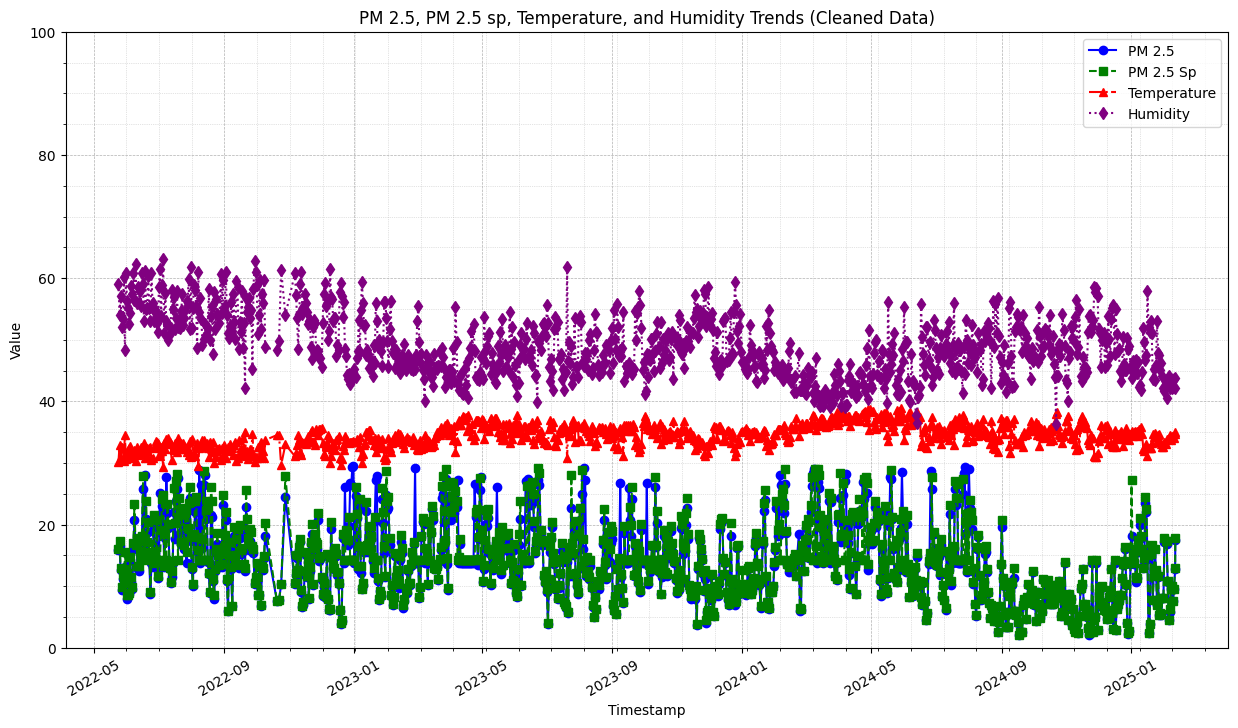

In [52]:
import matplotlib.pyplot as plt
import pandas as pd

# ตรวจสอบว่ามีคอลัมน์ Timestamp หรือไม่
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])  # แปลงเป็น datetime
    df = df.sort_values('timestamp')  # เรียงตามเวลา

# ตั้งค่าขนาดของกราฟ
plt.figure(figsize=(15, 8))

plt.plot(df_cleaned['timestamp'], df_cleaned['pm_2_5'], linestyle='-', marker='o', color='blue', label="PM 2.5")
plt.plot(df_cleaned['timestamp'], df_cleaned['pm_2_5_sp'], linestyle='--', marker='s', color='green', label="PM 2.5 Sp")
plt.plot(df_cleaned['timestamp'], df_cleaned['temperature'], linestyle='-.', marker='^', color='red', label="Temperature")
plt.plot(df_cleaned['timestamp'], df_cleaned['humidity'], linestyle=':', marker='d', color='purple', label="Humidity")

plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.title("PM 2.5, PM 2.5 sp, Temperature, and Humidity Trends (Cleaned Data)")

plt.ylim(0, 100)

# แสดง Grid และ Legend
plt.minorticks_on()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.grid(which='minor', linestyle=':', linewidth=0.5, alpha=0.7)
plt.legend()

# ปรับองศา Label ของแกน X ให้อ่านง่ายขึ้น
plt.xticks(rotation=30)

# แสดงกราฟ
plt.show()


In [53]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
#แปลงวันเป็นdatatime


In [54]:

print(df_cleaned.describe())

       Unnamed: 0                      timestamp    humidity      pm_2_5  \
count  971.000000                            971  971.000000  971.000000   
mean   485.000000  2023-10-11 16:28:15.120494336   48.879116   14.035268   
min      0.000000            2022-05-24 07:00:00   36.365861    2.069515   
25%    242.500000            2023-02-13 19:00:00   45.065212    9.592870   
50%    485.000000            2023-10-14 07:00:00   48.307295   13.739259   
75%    727.500000            2024-06-14 19:00:00   52.357946   17.631098   
max    970.000000            2025-02-11 11:12:42   63.074567   29.569414   
std    280.447856                            NaN    5.038836    6.031549   

        pm_2_5_sp  temperature  
count  971.000000   971.000000  
mean    14.073792    34.471353  
min      2.078204    29.306812  
25%      9.837589    33.206668  
50%     14.202060    34.533514  
75%     17.445598    35.833229  
max     29.190402    38.955797  
std      5.844793     1.857820  


In [56]:
print(df_cleaned["humidity"].describe())

count    971.000000
mean      48.879116
std        5.038836
min       36.365861
25%       45.065212
50%       48.307295
75%       52.357946
max       63.074567
Name: humidity, dtype: float64


In [57]:
print(df_cleaned["pm_2_5"].describe())

count    971.000000
mean      14.035268
std        6.031549
min        2.069515
25%        9.592870
50%       13.739259
75%       17.631098
max       29.569414
Name: pm_2_5, dtype: float64


In [58]:
print(df_cleaned["pm_2_5_sp"].describe())

count    971.000000
mean      14.073792
std        5.844793
min        2.078204
25%        9.837589
50%       14.202060
75%       17.445598
max       29.190402
Name: pm_2_5_sp, dtype: float64


In [59]:
print(df_cleaned["temperature"].describe())

count    971.000000
mean      34.471353
std        1.857820
min       29.306812
25%       33.206668
50%       34.533514
75%       35.833229
max       38.955797
Name: temperature, dtype: float64
